In [7]:
import Ploty as ploty 
import importlib
importlib.reload(ploty)
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import integrate

m = 1420    #kg
c = 0.35    #[-]
A = 2.42    #m^2
f = 0.01    #[-]
g = 9.81
rho = 1.23

array([0.00000000e+00+0.j, 6.71140940e-01+0.j, 1.34228188e+00+0.j,
       2.01342282e+00+0.j, 2.68456376e+00+0.j, 3.35570470e+00+0.j,
       4.02684564e+00+0.j, 4.69798658e+00+0.j, 5.36912752e+00+0.j,
       6.04026846e+00+0.j, 6.71140940e+00+0.j, 7.38255034e+00+0.j,
       8.05369128e+00+0.j, 8.72483221e+00+0.j, 9.39597315e+00+0.j,
       1.00671141e+01+0.j, 1.07382550e+01+0.j, 1.14093960e+01+0.j,
       1.20805369e+01+0.j, 1.27516779e+01+0.j, 1.34228188e+01+0.j,
       1.40939597e+01+0.j, 1.47651007e+01+0.j, 1.54362416e+01+0.j,
       1.61073826e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+0.j,
       1.66666667e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+0.j,
       1.66666667e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+0.j,
       1.66666667e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+0.j,
       1.66666667e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+0.j,
       1.66666667e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+0.j,
       1.66666667e+01+0.j, 1.66666667e+01+0.j, 1.66666667e+01+

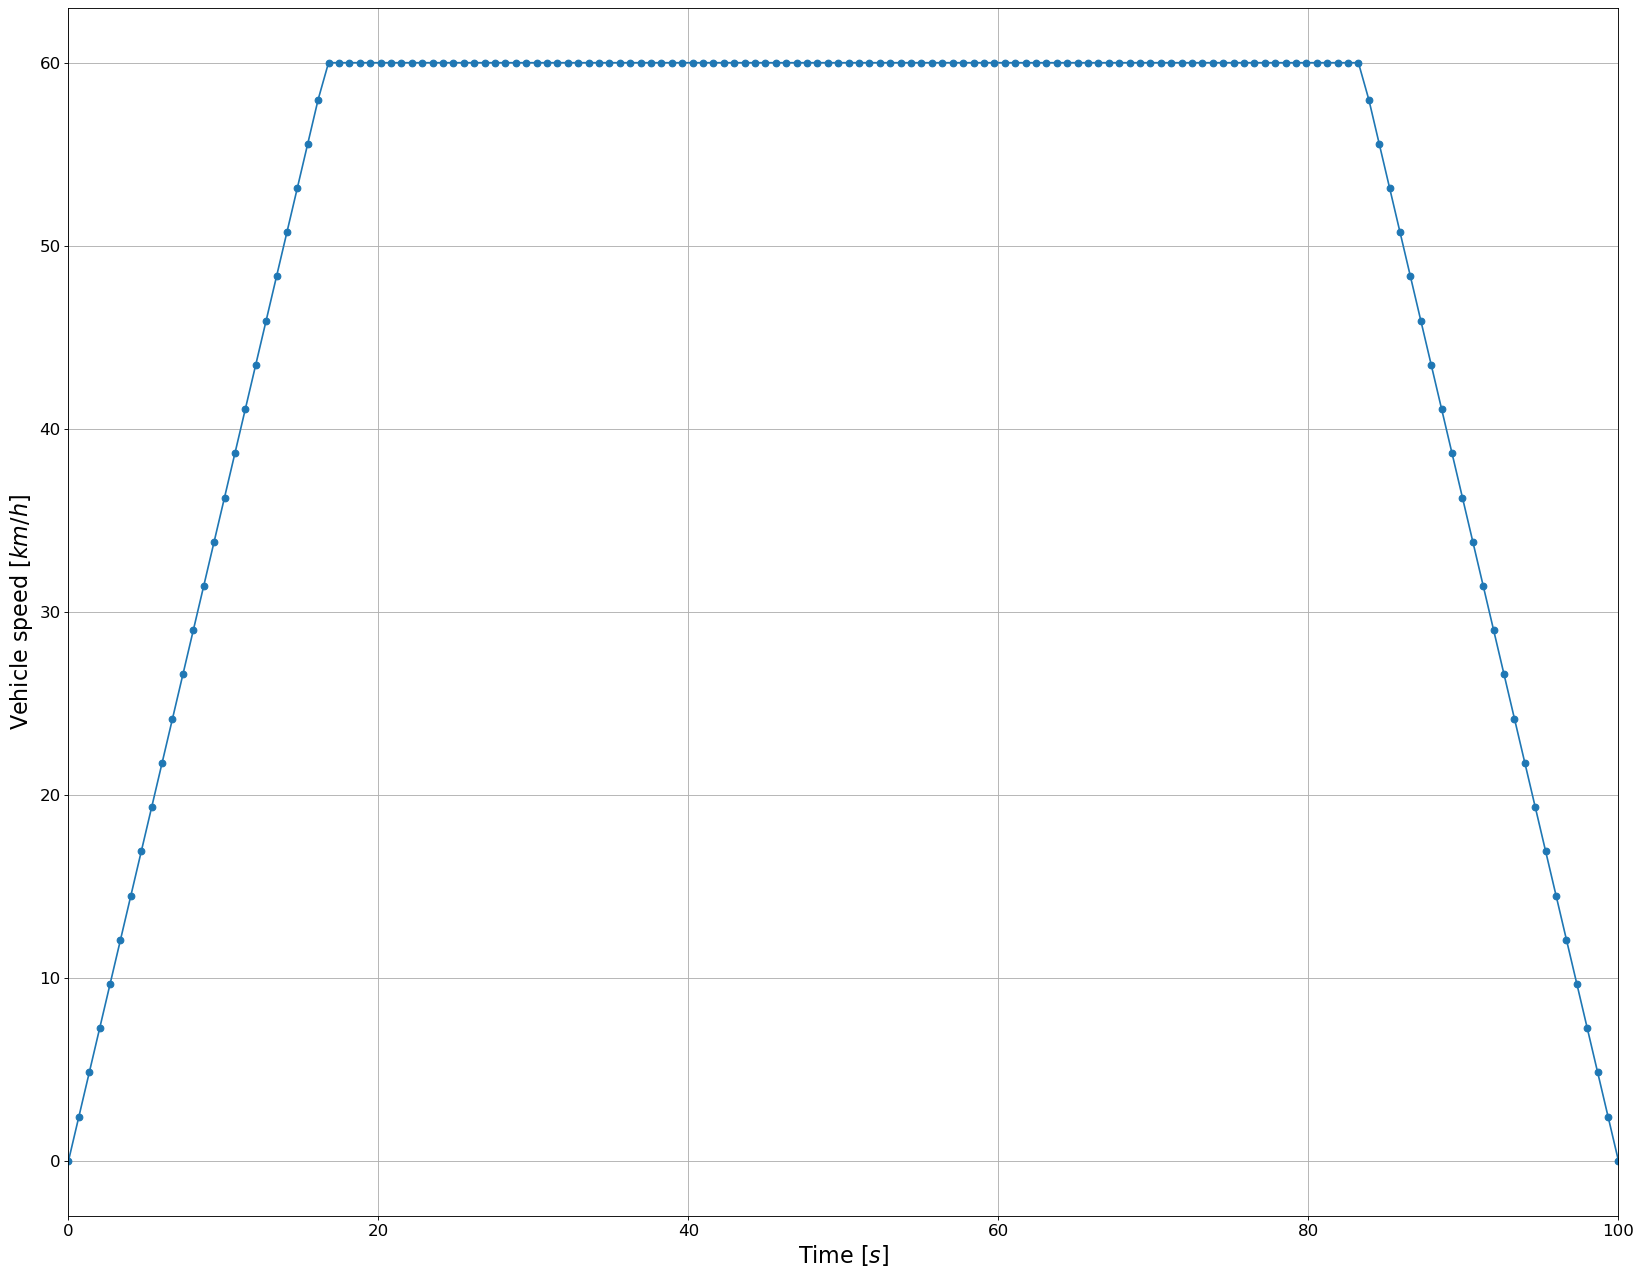

In [8]:
T = 100
v_avg = 50/3.6   #m/s
a_avg = 1     #m/s^2       

a_min = 4*v_avg/T                                       
a_cycle = a_avg*(a_avg>=a_min) + a_min*(a_avg<a_min)    

a = -a_cycle
b = a_cycle*T
C = -v_avg*T

d = (b**2) - (4*a*C)
# find two solutions
sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)
#-------------------------------------------
tp = sol2   ;  #display(tp)
v_st = a_avg*tp
t1 = 0 
t2 = tp
t3 = T - tp
t4 = T
#---------------------------------------
ap = a_cycle          ;       ah = -a_cycle
t = np.linspace(0,t4,150)
v = ap*t*(t<=t2) + ap*t2*(t>t2) + ah*(t-t3)*(t>=t3)
#---------------------------------------
tdist = integrate.cumtrapz(t, v, initial=0)
td = tdist[-1]
Tdist = td/1000
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Second Driving cycle
v_avg2 = 70/3.6   #m/s
a_avg2 = 1.1     #m/s^2  
a_min2 = 4*v_avg2/T                                       
a_cycle2 = a_avg2*(a_avg2>=a_min2) + a_min2*(a_avg2<a_min2)

a2 = -a_cycle2
b2 = a_cycle2*T
C2 = -v_avg2*T

d2 = (b2**2) - (4*a2*C2)
# find two solutions
sol1_2 = (-b-cmath.sqrt(d2))/(2*a2)
sol2_2 = (-b+cmath.sqrt(d2))/(2*a2)

tp2 = sol2_2   ;  #display(tp2)
v_st2 = a_avg2*tp2
t1 = 0 
t2 = tp2
t3 = T - tp2
t4 = T

ap2 = a_cycle2          ;       ah2 = -a_cycle2
t = np.linspace(0,t4,150)
v2 = ap2*t*(t<=t2) + ap2*t2*(t>t2) + ah2*(t-t3)*(t>=t3)
# -------------------------------------------------------------------------------------- Plotting
ploty.plot(t, v*3.6, 'o', label = 'Standard driving cycle')
#plt.plot(t, v2*3.6, marker='o', label = 'Auxiliary driving cycle')
plt.xlabel('Time [$s$]',fontsize=20)
plt.ylabel('Vehicle speed [$km/h$]',fontsize = 20)
#plt.ylim(0,150)
plt.xlim(0,100)
#plt.legend(loc='best', fontsize = 15)

np.max(v2*3.6)

v


(0.16000291110385204+0j)

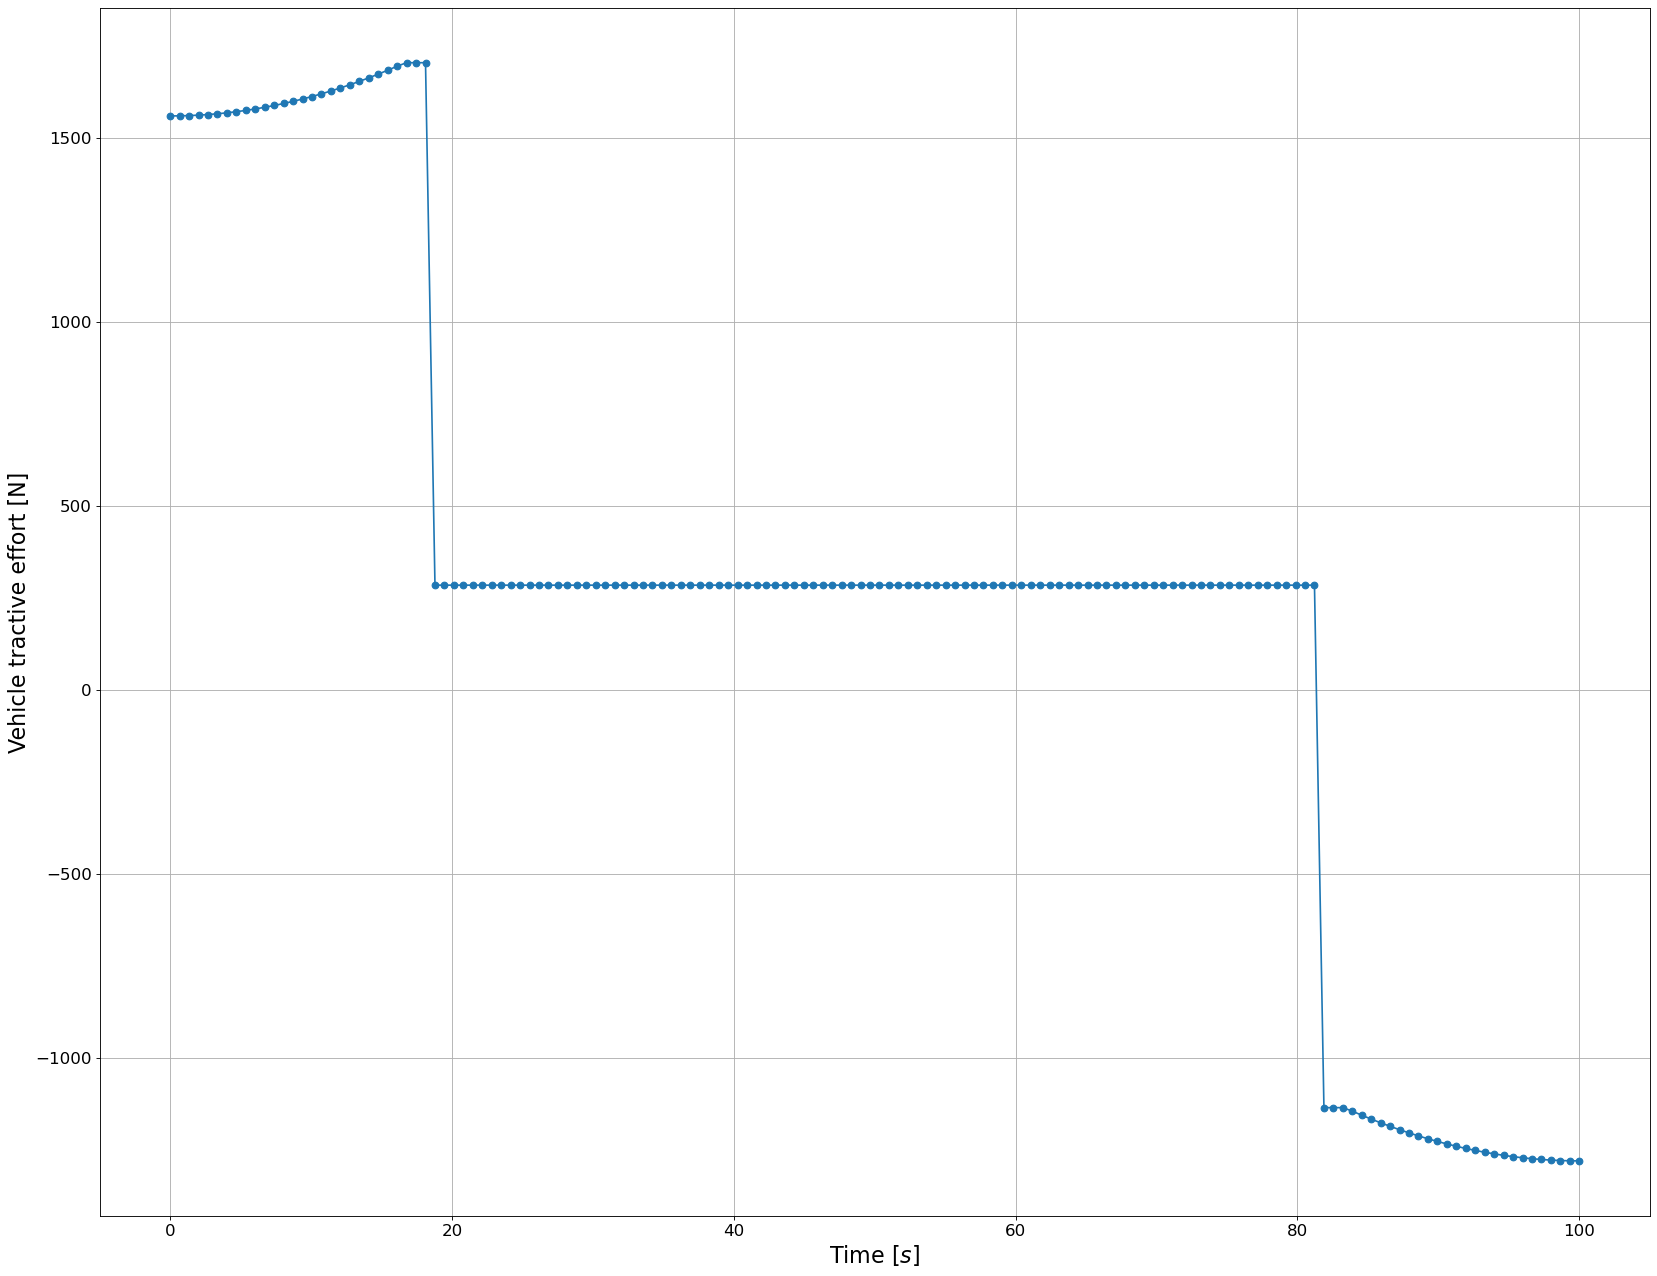

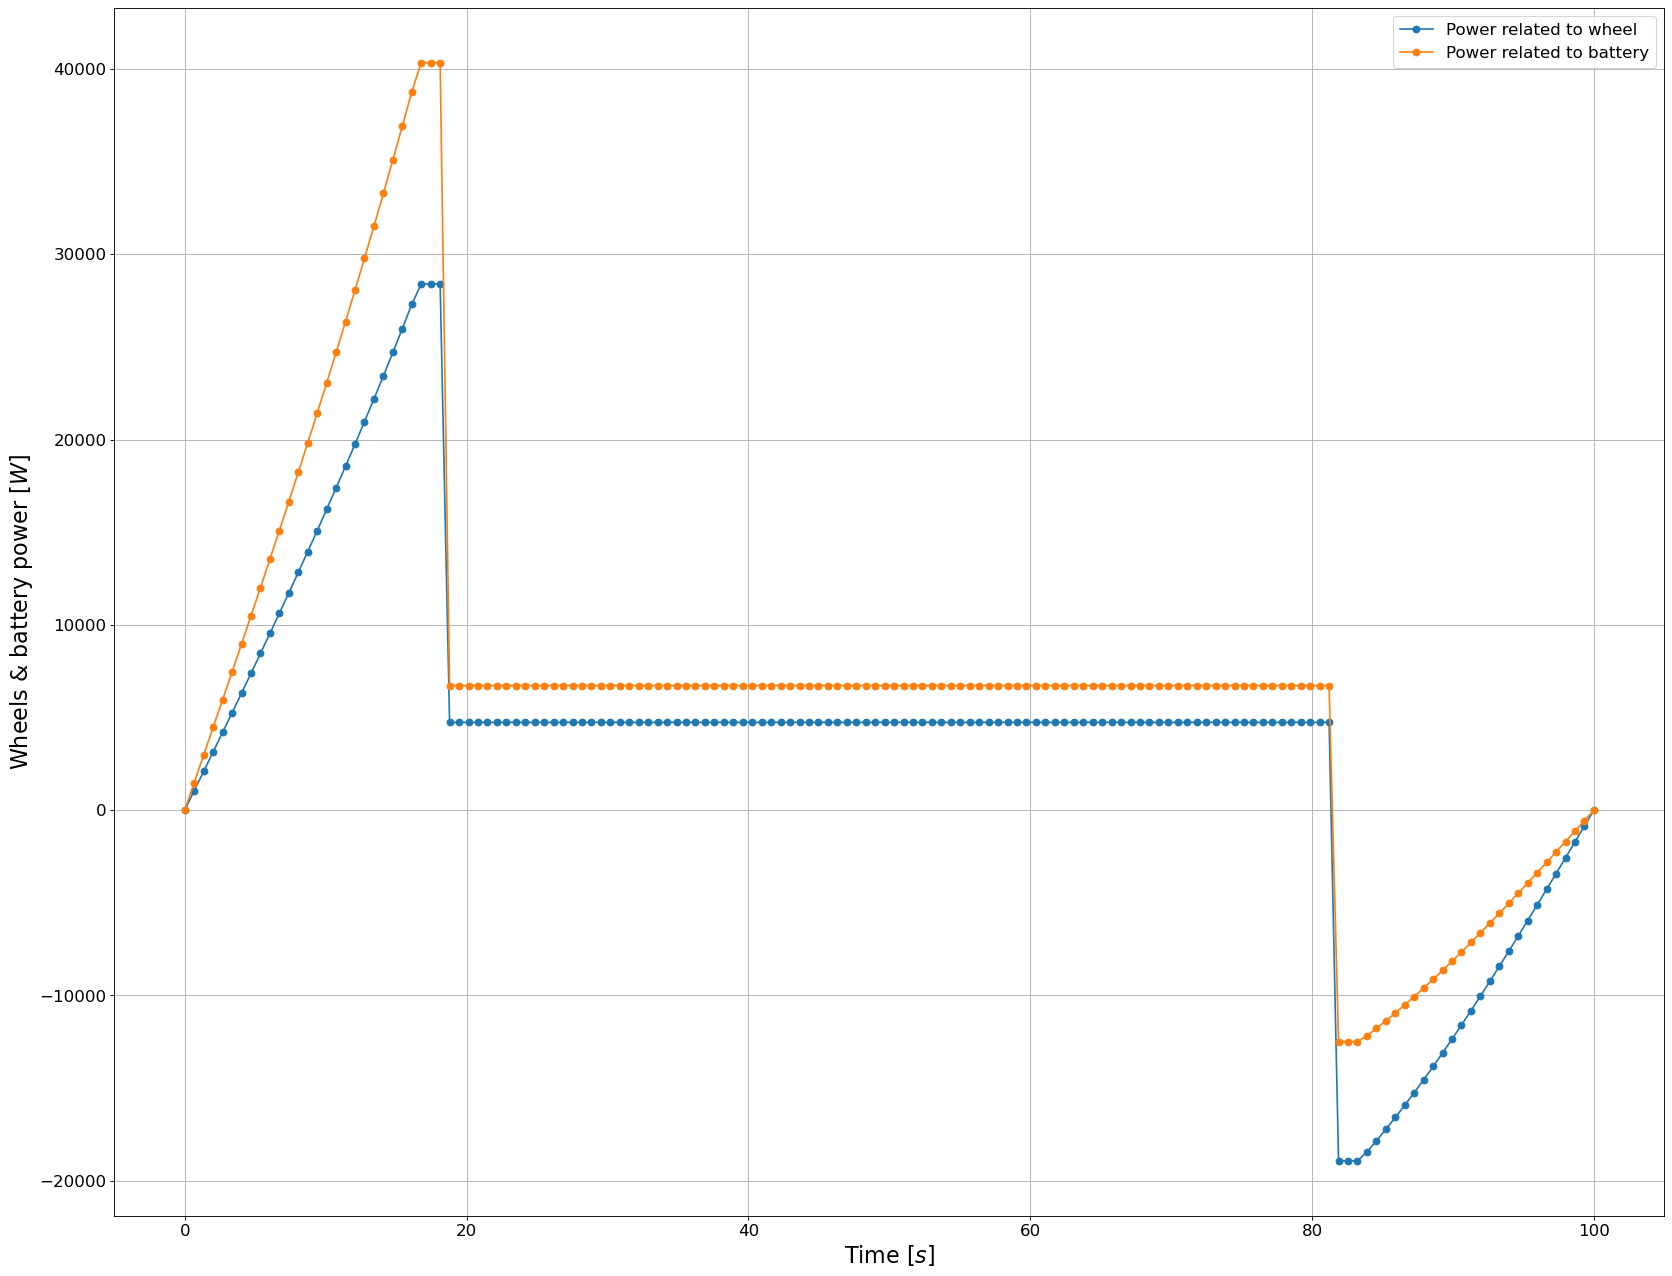

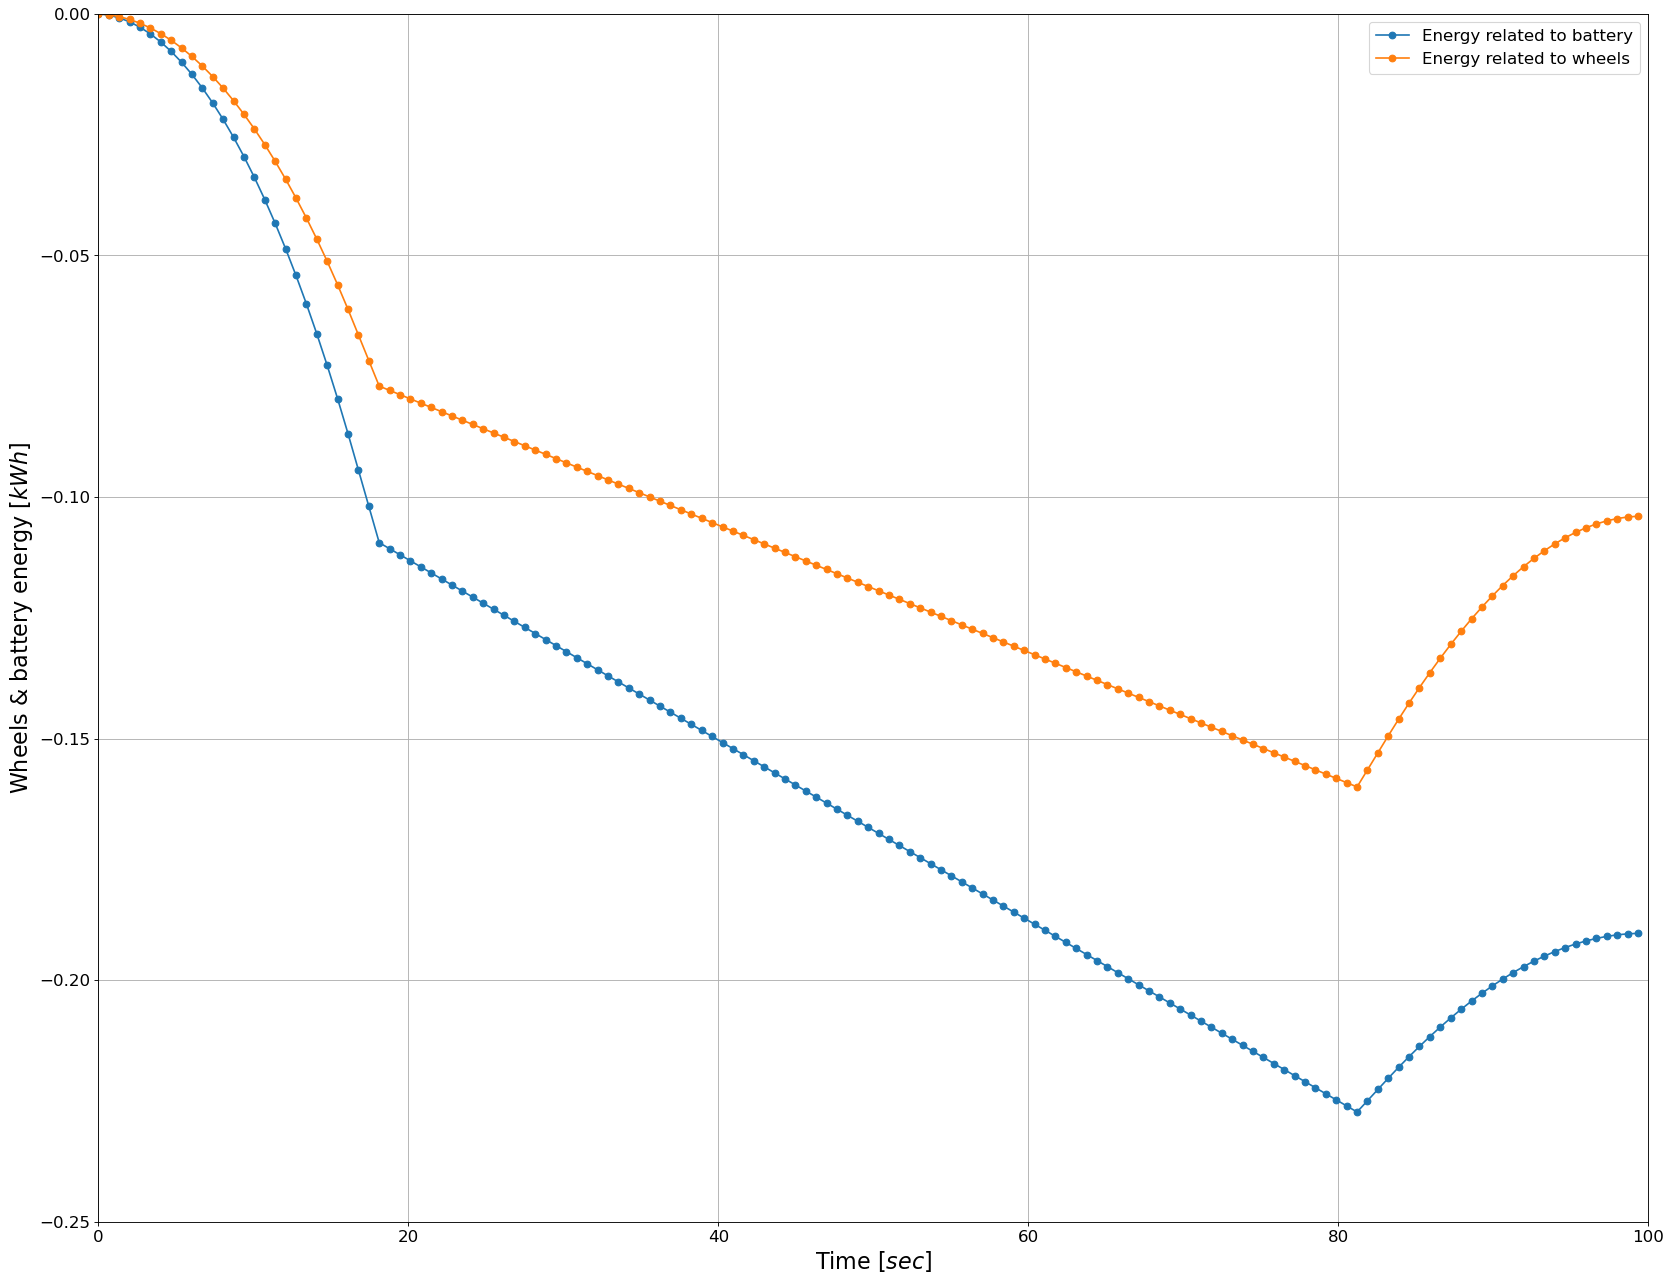

In [9]:
Ft = m*g*f + 1/2*rho*A*c*v**2 + m*ap*(t<=t2) + m*ah*(t>=t3)
P_wheel = Ft*v
ploty.plot(t, Ft, 'o')
plt.xlabel('Time [$s$]',fontsize=20)
plt.ylabel('Vehicle tractive effort [N]',fontsize = 20)
#---------------------------------------------------
E_cycle = np.cumsum(P_wheel[0:-1]*np.diff(t))
Ecyc_kWh = E_cycle/3.6
#---------------------------------------------------
eta1 = 0.88
eta2_a = 0.75
eta2_w = 0.80
eta = eta1*eta2_a*(t>=t3) + (1/(eta1*eta2_w))*(t<t3)
#---------------------------------------------------
Pak = P_wheel*eta
Pak_ob = -Pak

ploty.plot(t, P_wheel, 'o', label = 'Power related to wheel')
plt.plot(t, Pak, marker='o', label = 'Power related to battery')
plt.ylabel('Wheels & battery power [$W$]',fontsize = 20)
plt.xlabel('Time [$s$]',fontsize=20)
plt.legend(loc='best', fontsize=15)

Eak_t = np.cumsum(Pak_ob[0:-1]*np.diff(t))

Eak_max = np.max(E_cycle)
Eak_min = np.min(E_cycle)
DEak = Eak_max - Eak_min

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Second Diving cycle
Ft2 = m*g*f + 1/2*rho*A*c*v2**2 + m*ap2*(t<=t2) + m*ah2*(t>=t3)
P_wheel2 = Ft2*v2

E_cycle2 = np.cumsum(P_wheel2[0:-1]*np.diff(t))
Ecyc_kWh2 = E_cycle2/3.6

Pak2 = P_wheel2*eta
Pak_ob2 = -Pak2
Eak_t2 = np.cumsum(Pak_ob2[0:-1]*np.diff(t))
# ---------------------------------------------------------------------------------- Plotting
ploty.plot(t[0:-1],Eak_t/3600/1000,'o', label = 'Energy related to battery')
plt.plot(t[0:-1],-E_cycle/3600/1000,marker='o', label = 'Energy related to wheels')
#plt.plot(t[0:-1],Eak_t2/3600/1000,marker='o', label = 'Auxiliary Driving cycle')
plt.xlabel('Time [$sec$]',fontsize=20)
plt.ylabel('Wheels & battery energy [$kWh$]',fontsize = 20)
plt.xlim(0,100)
plt.ylim(-0.25, 0)
plt.legend(loc='best', fontsize = 15)

DEak/3600/1000

DEak/3600/1000